In [1]:
import numpy as np
import math
import random
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None 

In [3]:
#fig= plt.figure(figsize=(10,6), dpi=300)
font = {'family' : 'times new roman',
       'weight' : 'bold',
       'size'   : 16}
plt.rc('font', **font)

In [4]:
df_c = pd.read_csv("Cluster11_RE.csv")

In [5]:
df_c.iloc[:,2:14] = df_c.iloc[:,2:14].abs()

In [6]:
meter = df_c['idmeter'].unique()
df_c_RE = pd.DataFrame(columns = ['idmeter', 'r_entr_d2d_median', 'r_entr_d2d_morn_median', 'r_entr_d2d_daytime_median',
                                   'r_entr_d2d_pre-peak_median', 'r_entr_d2d_peak_median', 'r_entr_d2d_post-peak_median', 
                                   'r_entr_d2mean_median', 'r_entr_d2mean_morn_median', 'r_entr_d2mean_daytime_median',
                                   'r_entr_d2mean_pre-peak_median', 'r_entr_d2mean_peak_median', 'r_entr_d2mean_post-peak_median',
                                   'daily_mean', 'total_cons'])
for i in meter:
    df_c_m = df_c.loc[df_c['idmeter'] == i]
    m = df_c_m.loc[df_c_m['r_entr_d2d'] != np.inf, 'r_entr_d2d'].max()
    df_c_m['r_entr_d2d'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2d_morn'] != np.inf, 'r_entr_d2d_morn'].max()
    df_c_m['r_entr_d2d_morn'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2d_daytime'] != np.inf, 'r_entr_d2d_daytime'].max()
    df_c_m['r_entr_d2d_daytime'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2d_pre-peak'] != np.inf, 'r_entr_d2d_pre-peak'].max()
    df_c_m['r_entr_d2d_pre-peak'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2d_peak'] != np.inf, 'r_entr_d2d_peak'].max()
    df_c_m['r_entr_d2d_peak'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2d_post-peak'] != np.inf, 'r_entr_d2d_post-peak'].max()
    df_c_m['r_entr_d2d_post-peak'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2mean'] != np.inf, 'r_entr_d2mean'].max()
    df_c_m['r_entr_d2mean'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2mean_morn'] != np.inf, 'r_entr_d2mean_morn'].max()
    df_c_m['r_entr_d2mean_morn'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2mean_daytime'] != np.inf, 'r_entr_d2mean_daytime'].max()
    df_c_m['r_entr_d2mean_daytime'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2mean_pre-peak'] != np.inf, 'r_entr_d2mean_pre-peak'].max()
    df_c_m['r_entr_d2mean_pre-peak'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2mean_peak'] != np.inf, 'r_entr_d2mean_peak'].max()
    df_c_m['r_entr_d2mean_peak'].replace(np.inf, m, inplace=True)
    
    m = df_c_m.loc[df_c_m['r_entr_d2mean_post-peak'] != np.inf, 'r_entr_d2mean_post-peak'].max()
    df_c_m['r_entr_d2mean_post-peak'].replace(np.inf, m, inplace=True)
    
    median_d2d = df_c_m['r_entr_d2d'].median()
    median_d2d_morn = df_c_m['r_entr_d2d_morn'].median()
    median_d2d_daytime = df_c_m['r_entr_d2d_daytime'].median()
    median_d2d_pre_peak = df_c_m['r_entr_d2d_pre-peak'].median()
    median_d2d_peak = df_c_m['r_entr_d2d_peak'].median()
    median_d2d_post_peak = df_c_m['r_entr_d2d_post-peak'].median()
    median_d2mean = df_c_m['r_entr_d2mean'].median()
    median_d2mean_morn = df_c_m['r_entr_d2mean_morn'].median()
    median_d2mean_daytime = df_c_m['r_entr_d2mean_daytime'].median()
    median_d2mean_pre_peak = df_c_m['r_entr_d2mean_pre-peak'].median()
    median_d2mean_peak = df_c_m['r_entr_d2mean_peak'].median()
    median_d2mean_post_peak = df_c_m['r_entr_d2mean_post-peak'].median()
    median_dailymean = df_c_m['dailymean'].median()
    median_totalcons = df_c_m['totalcons'].median()
    df_c_RE = df_c_RE.append({'idmeter': i, 'r_entr_d2d_median': median_d2d, 'r_entr_d2d_morn_median': median_d2d_morn,
                                'r_entr_d2d_daytime_median': median_d2d_daytime, 'r_entr_d2d_pre-peak_median' : median_d2d_pre_peak, 
                                'r_entr_d2d_peak_median': median_d2d_peak, 'r_entr_d2d_post-peak_median': median_d2d_post_peak, 
                                'r_entr_d2mean_median': median_d2mean, 'r_entr_d2mean_morn_median': median_d2mean_morn, 
                                'r_entr_d2mean_daytime_median': median_d2mean_daytime, 'r_entr_d2mean_pre-peak_median': median_d2mean_pre_peak,
                                'r_entr_d2mean_peak_median': median_d2mean_peak, 'r_entr_d2mean_post-peak_median': median_d2mean_post_peak,
                                'daily_mean': median_dailymean, 'total_cons': median_totalcons}, ignore_index = True)
df_c_RE.to_csv("Cluster11_RE_Median.csv", index=False)

In [7]:
df_c_RE.head()

,idmeter,r_entr_d2d_median,r_entr_d2d_morn_median,r_entr_d2d_daytime_median,r_entr_d2d_pre-peak_median,r_entr_d2d_peak_median,r_entr_d2d_post-peak_median,r_entr_d2mean_median,r_entr_d2mean_morn_median,r_entr_d2mean_daytime_median,r_entr_d2mean_pre-peak_median,r_entr_d2mean_peak_median,r_entr_d2mean_post-peak_median,daily_mean,total_cons
0,22818304.0,0.115156,0.023122,0.026938,0.026407,0.035131,0.009949,0.098552,0.052011,0.047789,0.023076,0.041171,0.018430,35.65840,29584.590
1,23257166.0,0.064109,0.020328,0.021168,0.014570,0.021531,0.007828,0.046560,0.057176,0.024395,0.012784,0.035595,0.014507,36.55847,25226.355
2,22954106.0,0.078691,0.017664,0.023663,0.023147,0.033018,0.011964,0.075687,0.018630,0.050831,0.030112,0.032207,0.013829,35.99865,22989.330
3,22954144.0,0.159543,0.028862,0.034521,0.026714,0.046338,0.017590,0.123642,0.030213,0.046768,0.021592,0.036095,0.023311,34.22560,20468.754
4,22954066.0,0.093459,0.025536,0.040718,0.018487,0.029021,0.012861,0.076982,0.024100,0.035276,0.031175,0.040790,0.016693,33.99584,19781.253


In [8]:
df_c_RE['daily_mean_normalize']=(df_c_RE['daily_mean']-df_c_RE['daily_mean'].min())/(df_c_RE['daily_mean'].max()-df_c_RE['daily_mean'].min())

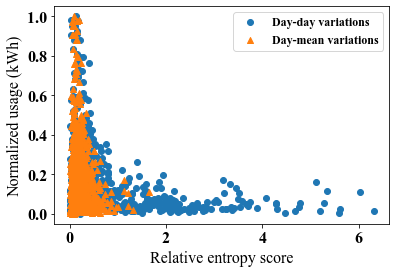

In [9]:
p1 = plt.scatter(df_c_RE['r_entr_d2d_median'], df_c_RE['daily_mean_normalize'])
p2 = plt.scatter(df_c_RE['r_entr_d2mean_median'], df_c_RE['daily_mean_normalize'], marker ="^")
#plt.rcParams.update({'font.size': 18})
plt.legend((p1, p2), ("Day-day variations", "Day-mean variations"), scatterpoints=1, loc='upper right',
           ncol=1, fontsize=12, fancybox=True)
plt.rcParams['figure.figsize'] = [6, 3]
plt.xlabel('Relative entropy score')
plt.ylabel('Normalized usage (kWh)')
#plt.yticks(np.arange(0, 1.1, 0.5))
plt.savefig(f"Plots/Cluster 11_daytoday_mean_plot.pdf", dpi=300, bbox_inches='tight')
plt.show()

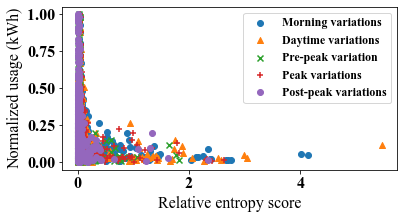

In [10]:
p1 = plt.scatter(df_c_RE['r_entr_d2d_morn_median'], df_c_RE['daily_mean_normalize'])
p2 = plt.scatter(df_c_RE['r_entr_d2d_daytime_median'], df_c_RE['daily_mean_normalize'], marker ="^")
p3 = plt.scatter(df_c_RE['r_entr_d2d_pre-peak_median'], df_c_RE['daily_mean_normalize'], marker ="x")
p4 = plt.scatter(df_c_RE['r_entr_d2d_peak_median'], df_c_RE['daily_mean_normalize'], marker ="+")
p5 = plt.scatter(df_c_RE['r_entr_d2d_post-peak_median'], df_c_RE['daily_mean_normalize'], marker ="o")
#plt.rcParams.update({'font.size': 18})
plt.legend((p1, p2, p3, p4, p5), 
           ("Morning variations", "Daytime variations", "Pre-peak variation", "Peak variations", "Post-peak variations"),
           scatterpoints=1, loc='upper right', ncol=1, fontsize=12, fancybox=True)
plt.rcParams['figure.figsize'] = [6, 3]
plt.xlabel('Relative entropy score')
plt.ylabel('Normalized usage (kWh)')
#plt.yticks(np.arange(0, 1.1, 0.5))
plt.savefig(f"Plots/Cluster 11_daytoday_all_plot.pdf", dpi=300, bbox_inches='tight')
plt.show()

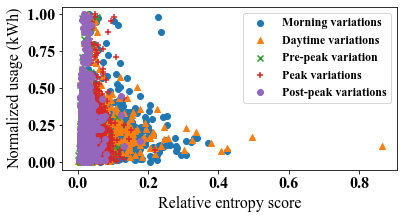

In [11]:
p1 = plt.scatter(df_c_RE['r_entr_d2mean_morn_median'], df_c_RE['daily_mean_normalize'])
p2 = plt.scatter(df_c_RE['r_entr_d2mean_daytime_median'], df_c_RE['daily_mean_normalize'], marker ="^")
p3 = plt.scatter(df_c_RE['r_entr_d2mean_pre-peak_median'], df_c_RE['daily_mean_normalize'], marker ="x")
p4 = plt.scatter(df_c_RE['r_entr_d2mean_peak_median'], df_c_RE['daily_mean_normalize'], marker ="+")
p5 = plt.scatter(df_c_RE['r_entr_d2mean_post-peak_median'], df_c_RE['daily_mean_normalize'], marker ="o")
#plt.rcParams.update({'font.size': 18})
plt.legend((p1, p2, p3, p4, p5), 
           ("Morning variations", "Daytime variations", "Pre-peak variation", "Peak variations", "Post-peak variations"),
           scatterpoints=1, loc='upper right', ncol=1, fontsize=12, fancybox=True)
plt.rcParams['figure.figsize'] = [6, 3]
plt.xlabel('Relative entropy score')
plt.ylabel('Normalized usage (kWh)')
#plt.yticks(np.arange(0, 1.1, 0.5))
plt.savefig(f"Plots/Cluster 11_daytomean_all_plot.pdf", dpi=300, bbox_inches='tight')
plt.show()